In [161]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [162]:
#Loading the dataset
shot_logs = pd.read_csv('./shot_logs.csv')
shot_logs.tail()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
128064,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,5,3,1:52,18.3,5,...,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,6,4,11:28,19.8,4,...,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,7,4,11:10,23.0,2,...,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
128067,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,8,4,2:37,9.1,4,...,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127
128068,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,9,4,0:12,NaN,5,...,5.1,2,made,"Bradley, Avery",202340,2.3,1,2,jarrett jack,101127


In [163]:
print("Total missing values: ")
shot_logs.isnull().any(axis=1).sum()

Total missing values: 


5567

In [164]:
print("Missing values per column")
shot_logs.isnull().sum()

Missing values per column


GAME_ID                          0
MATCHUP                          0
LOCATION                         0
W                                0
FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
GAME_CLOCK                       0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
SHOT_DIST                        0
PTS_TYPE                         0
SHOT_RESULT                      0
CLOSEST_DEFENDER                 0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
FGM                              0
PTS                              0
player_name                      0
player_id                        0
dtype: int64

In [166]:
# Calculates, for each player its overall conversion rate as the made shots over all shots took
players_ratios = {}
for player_name in shot_logs["player_name"].unique():
        player_shots = shot_logs[player_name==shot_logs["player_name"]]
        missed = player_shots[player_shots["SHOT_RESULT"] == 'missed']["SHOT_RESULT"].count()
        made = player_shots[player_shots["SHOT_RESULT"] == 'made']["SHOT_RESULT"].count()
        players_ratios[player_name] = float("%.2f"%(made/(missed+made)))

In [167]:
#Generating a data frame with the overall ratio for each player, now we can query by player name easily
overall_shot_ratio = pd.DataFrame(players_ratios, index=['ratio'])
overall_shot_ratio['kobe bryant']

ratio    0.37
Name: kobe bryant, dtype: float64

In [169]:
#Now lets do the same thing for 3 pts shot
players_ratios_3 = {}
for player_name in shot_logs["player_name"].unique():
        player_shots = shot_logs[player_name==shot_logs["player_name"]]
        three_pointers = player_shots[player_shots["SHOT_RESULT"] == 'made'][player_shots["PTS_TYPE"] == 3]["PTS_TYPE"].count()
        players_ratios_3[player_name] = float("%.2f"%(three_pointers/player_shots.PTS_TYPE.count()))

/root/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [170]:
three_points_shot_ratios = pd.DataFrame(players_ratios_3, index=['ratio'])
three_points_shot_ratios['kobe bryant']

ratio    0.08
Name: kobe bryant, dtype: float64

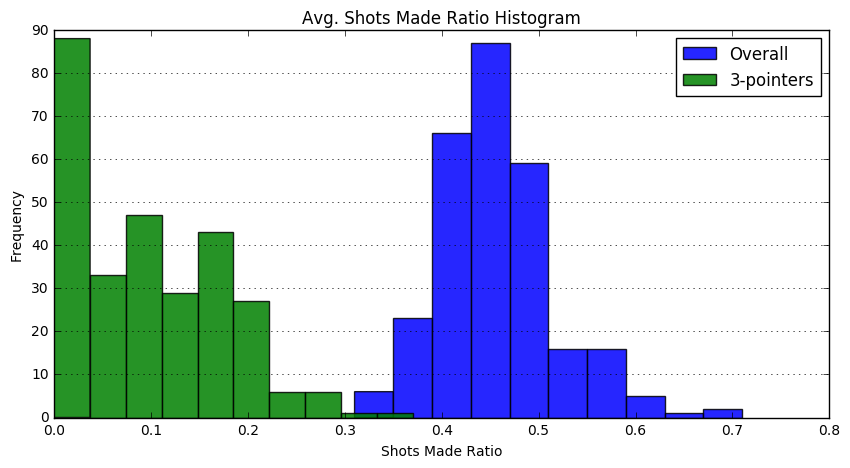

In [171]:
plt.figure(figsize=(10,5))
#Lets plot the histogram for the shot ratio
plt.title("Avg. Shots Made Ratio Histogram")
plt.ylabel("Frequency")
plt.xlabel("Shots Made Ratio")
plt.hist(overall_shot_ratio.T['ratio'], alpha =0.85)
#Lets plot the histogram for the 3 points shot ratio
plt.hist(three_points_shot_ratios.T['ratio'], color='g', alpha=0.85)
plt.grid(axis='y')
plt.legend(['Overall', '3-pointers'])
plt.show()

In [172]:
#Now, lets focus on a specific player
lebron_shots = shot_logs[shot_logs['player_name'] == 'lebron james']
lebron_shots.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
45834,21400900,"MAR 04, 2015 - CLE @ TOR",A,W,8,1,1,9:09,13.7,9,...,7.0,2,missed,"Johnson, James",201949,0.8,0,0,lebron james,2544
45835,21400900,"MAR 04, 2015 - CLE @ TOR",A,W,8,2,1,6:08,15.2,8,...,5.4,2,missed,"Valanciunas, Jonas",202685,2.5,0,0,lebron james,2544
45836,21400900,"MAR 04, 2015 - CLE @ TOR",A,W,8,3,1,4:38,12.3,0,...,23.2,3,made,"Johnson, James",201949,3.5,1,3,lebron james,2544
45837,21400900,"MAR 04, 2015 - CLE @ TOR",A,W,8,4,1,0:02,NaN,0,...,27.1,3,missed,"Ross, Terrence",203082,3.9,0,0,lebron james,2544
45838,21400900,"MAR 04, 2015 - CLE @ TOR",A,W,8,5,2,10:17,20.8,2,...,3.1,2,made,"Johnson, James",201949,3.5,1,2,lebron james,2544


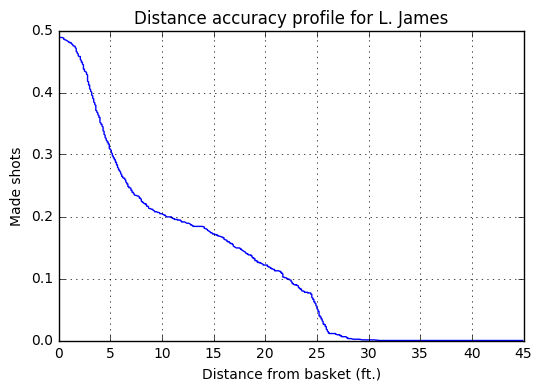

In [173]:
#Let's see how he does according to the distance of the shots
counts = lebron_shots.replace('made',1).replace('missed',0)
made_cumsum = counts.sort_values('SHOT_DIST', ascending=False)['SHOT_RESULT'].cumsum()
distances = counts.sort_values('SHOT_DIST', ascending=False)['SHOT_DIST']
plt.title("Distance accuracy profile for L. James")
plt.ylabel("Made shots")
plt.xlabel("Distance from basket (ft.)")
plt.grid()
plt.plot(distances, made_cumsum/counts['SHOT_RESULT'].count())
plt.show()

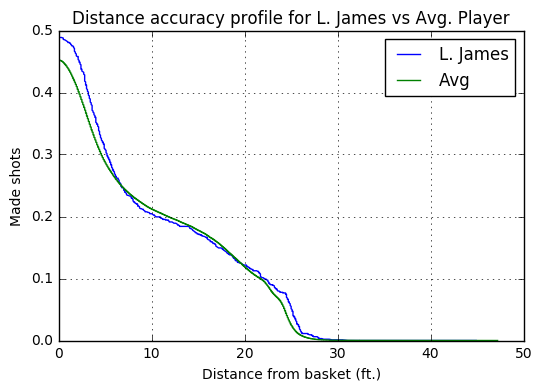

In [174]:
# Let's see how this compares to the average player
# For this we will profile the sum off all players and divide by total amount of players
all_players_shots = shot_logs.replace('made', 1).replace('missed', 0).sort_values('SHOT_DIST', ascending=False)
all_made_cumsum = all_players_shots['SHOT_RESULT'].cumsum()
all_dist = all_players_shots['SHOT_DIST']
plt.title("Distance accuracy profile for L. James vs Avg. Player")
plt.ylabel("Made shots")
plt.xlabel("Distance from basket (ft.)")
plt.grid()
plt.plot(distances, made_cumsum/counts['SHOT_RESULT'].count())
plt.plot(all_dist, all_made_cumsum/all_players_shots['SHOT_RESULT'].count())
plt.legend(['L. James', 'Avg'])
plt.show()

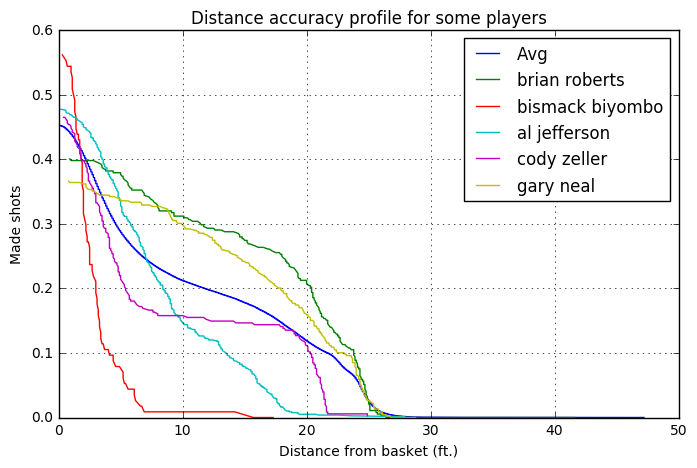

In [178]:
# Now let's compare maybe 4 or 5 players
plt.figure(figsize=(8,5))
legends = ['Avg']
plt.title("Distance accuracy profile for some players")
plt.ylabel("Made shots")
plt.xlabel("Distance from basket (ft.)")
plt.grid()
plt.plot(all_dist, all_made_cumsum/all_players_shots['SHOT_RESULT'].count())
#Grab the first 5 players to profile
for player_name in shot_logs['player_name'].unique()[:5]:
    player_shots = shot_logs[shot_logs['player_name'] == player_name]
    counts = player_shots.replace('made',1).replace('missed',0)
    made_cumsum = counts.sort_values('SHOT_DIST', ascending=False)['SHOT_RESULT'].cumsum()
    distances = counts.sort_values('SHOT_DIST', ascending=False)['SHOT_DIST']
    plt.plot(distances, made_cumsum/counts['SHOT_RESULT'].count())
    legends.append(player_name)
plt.legend(legends)
plt.show()